# Contexte
AB Consultants est une société qui sous-traite ses employés en tant que consultants auprès de diverses sociétés informatiques. Ils sont dans l'industrie depuis longtemps. Leur activité avait assez bien progressé par rapport au passé, mais ces derniers temps, il y a eu un ralentissement en termes de croissance parce que leurs meilleurs employés et les plus expérimentés ont commencé à quitter l'entreprise. Le vice-président de l’entreprise n’est pas très satisfait de leurs départs prématurés. Il vous a employé pour obtenir des informations sur les données des employés de la société et trouver une réponse pour savoir pourquoi les meilleurs employés et les plus expérimentés partent.

# Objectif
Le vice-président vous a exposé les exigences. En tant qu'analyste de données de l'entreprise, il vous appartient désormais de faire l'analyse requise et de découvrir les raisons pour lesquelles les meilleurs employés partent si tôt.
En utilisant Python, vous dérivez un modèle de prévision pour prédire quels employés pourraient quitter l'entreprise, ainsi qu'une probabilité de savoir pourquoi nos employés partent prématurément. Cela aidera à planifier nos prochaines étapes pour éviter le désabonnement. La base de données est en joint de ce dossier (HR_Data.csv)

Vous décidez de créer un notebook qui contiendra les éléments suivants :
-	Lecture de la base de données
-	Analyse sur la complétude des données, les valeurs aberrantes…
-	Analyse statistique, indicateurs afin de comprendre mieux les données
-	Visualisation et distribution (de tous les champs relatifs aux employés)
-	Etudiez la matrice de corrélation des variables entre elles 
-	Comparez différents modèles d'apprentissage automatique 
-	Découvrez pourquoi les meilleurs employés et les plus expérimentés partent prématurément
-	Donner un modèle de prédiction finale (le meilleur) aux prévisions

## Description de la base de données
Cette base de donnée se compose de 10 variables (colonnes) et de 14 999 observations (lignes). Chaque ligne représente un employé qui a des valeurs révélatrices pour chaque 10 variables :
- satisfaction_level : représente le niveau de satisfaction des employés entre 0 et 1, où 0 représente le niveau le plus faible et 1 le niveau le plus élevé.
- last_evaluation : représente le temps écoulé depuis la dernière évaluation de l'employé.
- number_project : représente le nombre de projets réalisés par l'employé jusqu'à présent.
- average_montly_hours : représente les heures mensuelles moyennes que l'employé a passées dans l'organisation.
- time_spend_company : représente le nombre d'années que l'employé a passé dans l'entreprise.
- Work_accident : indique s'ils ont un accident de travail ou non pendant qu'ils travaillent, où 0 signifie Non et 1 signifie Oui.
- promotion_last_5years : indique si l'employé a obtenu une promotion ou non au cours des 5 dernières années, où 0 signifie Non et 1 signifie Oui.
- sales : représente le département dans lequel l'employé travaille ou travaillait.
- salary : représente le salaire de l'employé, qu'il soit bas, moyen ou élevé.
- left : indique si l'employé a quitté l'organisation ou non, où 0 signifie Non et 1 signifie Oui.

## Lecture de la base de données

In [21]:
%matplotlib inline
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('HR_DATA.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Analyse sur la complétude des données

In [23]:
# Vérification du type de données et des valeurs nulles pour chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Les résultats ci-dessus nous suggèrent qu'il n'y a pas de valeurs nulles dans notre ensemble de données et que les types de données sont également corrects pour toutes les colonnes.

## Analyse statistique

In [24]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Le niveau moyen de satisfaction des salariés est de 0,6128, le nombre moyen de projets réalisés par les salariés est d'environ 4, le nombre moyen d'heures mensuelles passées par les salariés est de 201,0503 et le temps moyen passé en entreprise par les salariés est d'environ 4 ans.

In [25]:
print("Départements :\n", data['sales'].value_counts().to_string())
print("\nTranches de salaire :\n", data['salary'].value_counts().to_string())

Départements :
 sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630

Tranches de salaire :
 low       7316
medium    6446
high      1237


Sur l'ensemble des 10 départements, la plupart des employés sont dans le secteur de la vente, tandis que le nombre d'employés dans le secteur de la gestion est le plus faible. Les colonnes relatives aux salaires suggèrent que, d'après les données disponibles, la plupart des employés sont mal payés.

Nous allons maintenant essayer d'explorer les données en regroupant différentes colonnes avec notre variable cible 'left' afin de générer un aperçu.

In [26]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

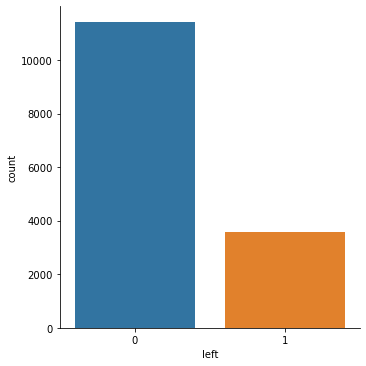

In [27]:
sns.catplot(data = data,x='left',kind="count")

Les résultats ci-dessus nous indiquent que 3571 employés sont partis et 11428 employés sont restés.

In [28]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [29]:
print('Left Vs all numeric variable:\n\n',data.groupby('left').mean())

Left Vs all numeric variable:

       satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


#### Raisons qui semblent rationnelles :
- Les personnes ayant un faible niveau de satisfaction
- Les personnes ayant un salaire moins élevé
- Les personnes ayant un faible taux de promotion
- Les personnes qui ont travaillé plus

## Visualisation et distribution

#### Promotion au cours des 5 dernières années

C:\Users\Loana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'employés")

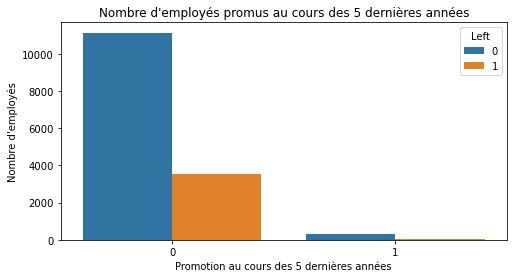

In [30]:
plt.figure(figsize = (8,4))
sns.countplot(data['promotion_last_5years'], hue=data['left'])
plt.title("Nombre d'employés promus au cours des 5 dernières années")
plt.legend(title='Left')
plt.xlabel('Promotion au cours des 5 dernières années')
plt.ylabel("Nombre d'employés")

Moins de 4000 salariés ont quitté l'entreprise car ils ne sont pas satisfaits de leur niveau de promotion.

#### Niveau de salaire

C:\Users\Loana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'employés")

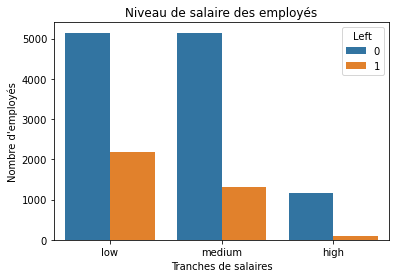

In [31]:
plt.figure()
sns.countplot(data['salary'], hue=data['left'])
plt.title('Niveau de salaire des employés')
plt.legend(title='Left')
plt.xlabel('Tranches de salaires')
plt.ylabel("Nombre d'employés")

Il semble que les salariés avec des niveaux de salaires faibles ou moyens sont plus susceptible de quitter l'entreprise.

#### Accident de travail

C:\Users\Loana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'employés")

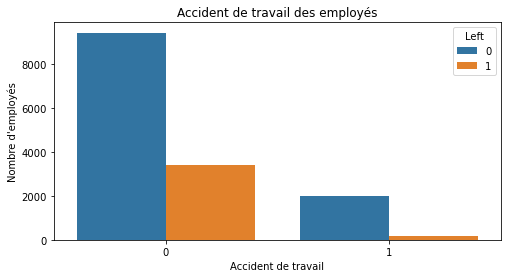

In [32]:
plt.figure(figsize = (8,4))
sns.countplot(data['Work_accident'], hue=data['left'])
plt.title('Accident de travail des employés')
plt.legend(title='Left')
plt.xlabel('Accident de travail')
plt.ylabel("Nombre d'employés")

De nombreux salariés ont quitté l'entreprise alors qu'ils n'avaient pas eu d'accident de travail. Ainsi, l'accident de travail ne peut pas généraliser la raison pour laquelle un salarié a quitté l'entreprise.

#### Niveau de satisfaction

Text(0, 0.5, "Nombre d'employés")

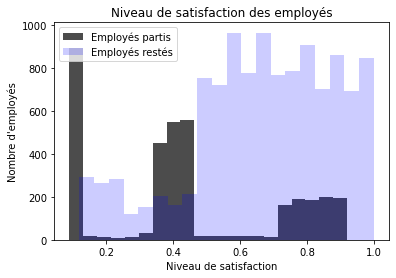

In [33]:
plt.figure()
plt.hist(data[data['left'] == 1]['satisfaction_level'], bins=20, alpha = 0.7, label='Employés partis',color='black')
plt.hist(data[data['left'] == 0]['satisfaction_level'],bins=20,alpha = 0.2, label='Employés restés',color='blue')
plt.legend()
plt.title('Niveau de satisfaction des employés')
plt.xlabel('Niveau de satisfaction')
plt.ylabel("Nombre d'employés")

De toute évidence, de nombreuses personnes qui avaient montré moins de 50% de satisfaction ont quitté l'entreprise.

#### Département

C:\Users\Loana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'employés")

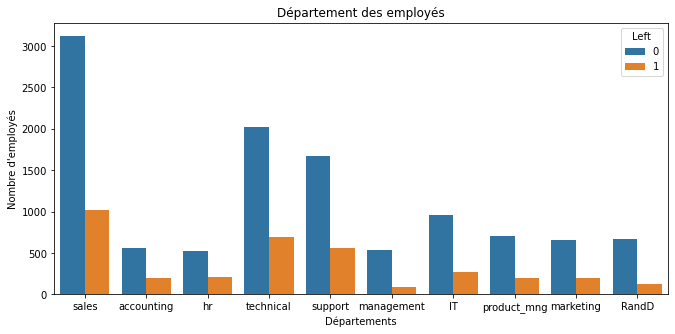

In [34]:
plt.figure(figsize=(11,5))
sns.countplot(data['sales'], hue=data['left'])
plt.title('Département des employés')
plt.legend(title='Left')
plt.xlabel('Départements')
plt.ylabel("Nombre d'employés")

La majorité des salariés qui sont partis appartiennent aux départements des ventes, de la comptabilité et des techniques par rapport aux autres départements.

## Comparaison de différents modèles

### Data pre-processing
Il est nécessaire de traiter les variables catégorielles car tout modèle de Machine Learning ne peut accepter que des valeurs numériques. Il est donc nécessaire de préparer nos données sous forme numérique pour les intégrer dans les modèles.

In [35]:
data = pd.get_dummies(data, columns=['sales']) #variable catégorielle nominale
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')

In [36]:
salary_range = { #variable catégorielle ordinale
    'low': 3,
    'medium': 2,
    'high': 1
}
        
data['salary_numeric'] = data.salary.map(salary_range)
data['salary_numeric'].value_counts()

3    7316
2    6446
1    1237
Name: salary_numeric, dtype: int64

In [37]:
data.drop(['salary'], axis=1, inplace=True)
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_numeric'],
      dtype='object')

### Matrice de corrélation

In [38]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_numeric
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,-0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,-0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.098119
sales_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,0.010959
sales_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,-0.070240,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.002800


Les variables qui sont positivement associées à la caractéristique 'left' sont : 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'sales_accounting', 'sales_hr', 'sales_sales', 'sales_support', 'sales_technical', 'salary_numeric'.

Une dernière étape avant de commencer à appliquer les modèles de classification consiste à séparer la variable prédite 'left' avec le reste des variables prédictives, puis à diviser l'ensemble de données en sous-ensembles de train set et de test set. Cette division nous assure que notre modèle fonctionne bien sur un nouvel ensemble de données. 

Notre *target* est donc 'left'.
Nous avons pris 80% de nos données pour le train set et 20 % pour l'ensemble de test.

In [39]:
data_vars=data.columns.values.tolist()
y = ['left']
X = [i for i in data_vars if i not in y]

print('y variable being our output variable \n', y)
print('X variable being our input dataframe \n', X)

y variable being our output variable 
 ['left']
X variable being our input dataframe 
 ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical', 'salary_numeric']


Nous utilisons Recursive Feature Elimination (RFE) qui fonctionne de manière récursive en supprimant des variables et en construisant un modèle sur les variables qui restent dans ce processus. Elle utilise également la précision du modèle pour trouver quelles variables ou combinaisons de variables contribuent le plus à la prédiction de l'attribut cible.

In [40]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe = RFE(lr, 10)
rfe = rfe.fit(data[X], data[y])

print(rfe.support_)
print(rfe.ranking_)

C:\Users\Loana\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Loana\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Loana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[ True  True  True False  True  True  True False  True False  True  True
 False False False False False  True]
[1 1 1 9 1 1 1 2 1 6 1 1 7 3 8 5 4 1]


Nous pouvons voir que RFE a choisi pour nous les 10 variables, qui sont marquées True dans le tableau support et marquées d'un chiffre "1" dans le tableau ranking_array : 'satisfaction_level', 'last_evaluation', 'number_project' 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_RandD', 'sales_hr', 'sales_management', 'salary_numeric'.

In [41]:
col_RFE = ['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 
           'promotion_last_5years', 'sales_RandD', 'sales_hr', 'sales_management', 'salary_numeric']

X = data[col_RFE]
y = data['left']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [44]:
from sklearn.metrics import accuracy_score

print('Train accuracy : {:.3f}'.format(accuracy_score(y_train, logreg.predict(X_train))))
print('Test accuracy : {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Train accuracy : 0.798
Test accuracy : 0.796


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2299
           1       0.60      0.37      0.46       701

    accuracy                           0.80      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.78      0.80      0.78      3000



In [46]:
from sklearn.metrics import confusion_matrix

logreg_y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, logreg_y_pred)
cm

array([[2126,  173],
       [ 439,  262]], dtype=int64)

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
print('Train accuracy : {:.3f}'.format(accuracy_score(y_train, rf.predict(X_train))))
print('Test accuracy : {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Train accuracy : 0.999
Test accuracy : 0.989


In [49]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2299
           1       0.98      0.97      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [50]:
rf_y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, rf_y_pred)
cm

array([[2286,   13],
       [  19,  682]], dtype=int64)

## Support Vector Machine

In [51]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [52]:
print('Train accuracy: {:.3f}'.format(accuracy_score(y_train, svc.predict(X_train))))
print('Test accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Train accuracy: 0.927
Test accuracy: 0.933


In [53]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2299
           1       0.85      0.87      0.86       701

    accuracy                           0.93      3000
   macro avg       0.90      0.91      0.91      3000
weighted avg       0.93      0.93      0.93      3000



In [54]:
svc_y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, svc_y_pred)
cm

array([[2188,  111],
       [  91,  610]], dtype=int64)

## Model selection
Nous avons réalisé 3 modèles de classification : régression logistique, forêt aléatoire et SVM (Support Vector Machine). En dehors de cela, nous savons que si nous faisons face à des problèmes de classification, l'*accuracy* n'est pas le seul paramètre à prendre en compte pour évaluer notre modèle. Pour un problème de classification, il faut également tenir compte de la précision, du recall, de la matrice de confusion (vrai positif, faux positif, vrai négatif, faux négatif).

Parlons maintenant de notre problème, à savoir la perte d'employés. Nous devons donc nous concentrer davantage sur le vrai positif et le faux positif. Pour comprendre notre problème, les vrais positifs sont les employés qui quittent l'entreprise et notre modèle de Machine Learning le prédit correctement, et les faux positifs sont les employés qui vont quitter l'entreprise mais notre modèle prédit qu'ils resteront. Nous devons donc garder à l'esprit, avant de sélectionner un modèle parmi les 3 modèles ci-dessus, que le modèle qui a le plus de précision est celui qui a le moins de faux positifs.

En examinant les 3 modèles, nous réalisons que Random Forest gagne la course avec une grande précision et une grande exactitude. Cela avec un score de 0,98 pour la précision pour les employés qui vont partir et un test de précision avec 0,988.
Nous choisissons donc Ranfom Forest comme le meilleur modèle pour le problème du départ des employés.

## Cross Validation
La Cross-Validation est l'une des techniques les plus importantes pour généraliser notre modèle ou l'empêcher de s'adapter à notre ensemble de données.

Nous utilisons Random Forset comme notre meilleur modèle avec 10 k-fold Cross-Validation.

In [55]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=0)

modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)

print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Loana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


10-fold cross validation average accuracy: 0.988


La précision moyenne reste très proche de la précision du modèle Random Forest. Nous pouvons donc conclure que le modèle se généralise bien.

## Courbe ROC
Les courbes ROC et AUC nous aident à évaluer quel modèle de classification est le mieux adapté pour le faire fonctionner et à comprendre dans quel modèle et à quel seuil notre modèle nous donne le meilleur rappel ou le taux de vrai positif avec le taux de faux positif le moins élevé.

Nous ne considérons pas la VPC dans la courbe ROC car l'analyse de la courbe ROC n'utilise pas la précision ou le taux d'erreur. Une courbe ROC représente la sensibilité (axe des y) en fonction de la spécificité (axe des x) et le SVC donne la probabilité de 0 ou 1 dans la sortie.

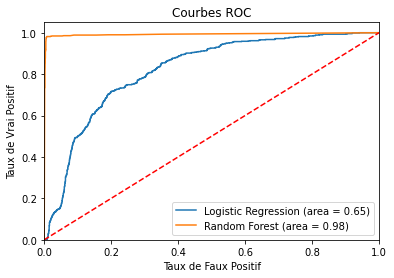

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positif')
plt.ylabel('Taux de Vrai Positif')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

Random Forest est le meilleur modèle pour ce problème spécifique car il est loin de la ligne pointillée qui représente la courbe ROC d'un classificateur purement aléatoire. Un bon *classifier* se tient aussi loin que possible de cette ligne que vers le coin supérieur gauche (forme d'angle droit).

## Pourquoi les meilleurs employés et les plus expérimentés partent prématurément
Nous voulons comprendre quelle variable affecte le plus le taux de roulement des employés. Cela peut aider le responsable des ressources humaines à comprendre pourquoi un employé va changer d'emploi et à se concentrer sur le maintien de cet employé et à essayer d'améliorer ce secteur de l'entreprise.

In [57]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'Work_accident',
                           'promotion_last_5years', 'sales_RandD', 'sales_hr', 'sales_management', 'salary_numeric'])

importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()

for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.18%
sales_management-0.20%
sales_hr-0.24%
sales_RandD-0.24%
Work_accident-0.95%
salary_numeric-1.40%
last_evaluation-16.32%
number_project-18.94%
time_spend_company-21.57%
satisfaction_level-39.96%


Les résultats ci-dessus montrent l'importance de chaque variable par ordre croissant, 'sales_management' et 'promotion_last_5years' étant les moins importantes et 'satisfaction_level' étant la variable la plus importante pour comprendre la raison du départ des employés.